In [20]:
import time
from datetime import datetime, timedelta
import requests
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
API_KEY = "CG-2gceFcHopHkstg8W1d72mpFT"
TOP_N = 20
DAYS_BACK = 365
CHUNK_SIZE = 88

headers = {
    "x-cg-demo-api-key": API_KEY
}

In [30]:
def get_top_coins(limit):
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "order": "market_cap_desc",
        "per_page": limit,
        "page": 1,
        "sparkline": "false"
    }
    response = requests.get(url, headers=headers, params=params)
    response.raise_for_status()
    return [coin["id"] for coin in response.json()]

def get_hourly_market_caps(coin_id):
    end_time = datetime.now()
    start_time = end_time - timedelta(days=DAYS_BACK)
    
    market_caps = []
    
    current_start = start_time
    while current_start < end_time:
        current_end = min(current_start + timedelta(days=CHUNK_SIZE), end_time)
        
        url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
        params = {
            "vs_currency": "usd",
            "from": int(current_start.timestamp()),
            "to": int(current_end.timestamp())
        }
        
        try:
            response = requests.get(url, headers=headers, params=params)
            if response.status_code == 429:
                time.sleep(10)
                continue
            response.raise_for_status()
            data = response.json()
            if "market_caps" in data:
                market_caps.extend(data["market_caps"])
        except Exception:
            pass
            
        time.sleep(4)
        current_start = current_end

    return market_caps

In [31]:
coin_ids = get_top_coins(TOP_N)
time.sleep(4)

all_data = {}

for coin_id in tqdm(coin_ids):
    mc_data = get_hourly_market_caps(coin_id)
    series = pd.Series(
        [x[1] for x in mc_data],
        index=pd.to_datetime([x[0] for x in mc_data], unit='ms')
    )
    series = series[~series.index.duplicated(keep='first')]
    all_data[coin_id] = series

100%|██████████| 1/1 [00:29<00:00, 29.88s/it]


In [ ]:
df = pd.DataFrame(all_data)
df = df.sort_index()

display(df)
display(df.shape)

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,solana,tron,staked-ether,dogecoin,figure-heloc,cardano,wrapped-steth,bitcoin-cash,whitebit,wrapped-bitcoin,wrapped-beacon-eth,usds,wrapped-eeth,binance-bridged-usdt-bnb-smart-chain
2025-01-29 17:00:45.329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.261455e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 17:03:39.712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.092940e+09,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 17:03:40.712,NaN,NaN,NaN,NaN,1.751991e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 17:03:41.389,NaN,NaN,1.394353e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 17:03:41.942,NaN,NaN,NaN,9.675420e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-29 16:01:50.063,NaN,3.396224e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-29 16:02:06.694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.683604e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-29 16:02:06.817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.055207e+10,NaN,NaN,NaN,NaN
2026-01-29 16:02:53.713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.257362e+09,NaN


(168956, 20)

In [44]:
df_h = df.resample("h").last()
display(df_h)
display(df_h.shape)

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,solana,tron,staked-ether,dogecoin,figure-heloc,cardano,wrapped-steth,bitcoin-cash,whitebit,wrapped-bitcoin,wrapped-beacon-eth,usds,wrapped-eeth,binance-bridged-usdt-bnb-smart-chain
2025-01-29 17:00:00,2.021068e+12,3.716869e+11,1.394353e+11,9.675420e+10,1.751991e+11,5.256738e+10,1.105947e+11,2.049239e+10,2.928605e+10,4.780735e+10,NaN,3.299460e+10,1.261455e+10,8.092940e+09,4.114163e+09,1.308968e+10,2.321656e+08,6.827297e+09,6.282184e+09,0.000000e+00
2025-01-29 18:00:00,2.031854e+12,3.758849e+11,1.394517e+11,9.712797e+10,1.753915e+11,5.253994e+10,1.119540e+11,2.061693e+10,2.953141e+10,4.811427e+10,NaN,3.324583e+10,1.267591e+10,8.146758e+09,4.093920e+09,1.318538e+10,2.342997e+08,6.826336e+09,6.335783e+09,0.000000e+00
2025-01-29 19:00:00,2.039465e+12,3.767651e+11,1.394504e+11,9.746921e+10,1.763237e+11,5.254205e+10,1.122312e+11,2.065410e+10,2.959489e+10,4.835759e+10,NaN,3.327493e+10,1.265587e+10,8.197485e+09,4.093749e+09,1.326072e+10,2.347890e+08,6.822541e+09,6.347513e+09,0.000000e+00
2025-01-29 20:00:00,2.053629e+12,3.774812e+11,1.394387e+11,9.739889e+10,1.776295e+11,5.254389e+10,1.133856e+11,2.077008e+10,2.967819e+10,4.860296e+10,NaN,3.368910e+10,1.258413e+10,8.234103e+09,4.089602e+09,1.331612e+10,2.359994e+08,6.850807e+09,6.379521e+09,0.000000e+00
2025-01-29 21:00:00,2.067678e+12,3.787342e+11,1.394697e+11,9.801678e+10,1.787041e+11,5.255887e+10,1.142145e+11,2.081820e+10,2.972077e+10,4.885930e+10,NaN,3.414129e+10,1.279326e+10,8.298364e+09,4.108865e+09,1.344209e+10,2.362416e+08,6.823812e+09,6.407853e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-29 12:00:00,1.751386e+12,3.531735e+11,1.860573e+11,1.218336e+11,1.135991e+11,7.106712e+10,6.942623e+10,2.788339e+10,2.789098e+10,2.037946e+10,NaN,1.272916e+10,1.252451e+10,1.152614e+10,1.144653e+10,1.092690e+10,1.070969e+10,9.259228e+09,9.641648e+09,8.970588e+09
2026-01-29 13:00:00,1.757832e+12,3.538386e+11,1.860583e+11,1.212042e+11,1.137317e+11,7.104721e+10,6.937010e+10,2.789744e+10,2.791973e+10,2.031188e+10,NaN,1.267099e+10,1.254211e+10,1.146632e+10,1.144439e+10,1.095425e+10,1.074192e+10,9.309722e+09,9.659534e+09,8.971031e+09
2026-01-29 14:00:00,1.755353e+12,3.537122e+11,1.860543e+11,1.212691e+11,1.138844e+11,7.099715e+10,6.942688e+10,2.790020e+10,2.792920e+10,2.036489e+10,1.516415e+10,1.271587e+10,1.253121e+10,1.148354e+10,1.145449e+10,1.095959e+10,1.073084e+10,9.309655e+09,9.655228e+09,8.969653e+09
2026-01-29 15:00:00,1.739320e+12,3.476429e+11,1.860539e+11,1.199395e+11,1.117912e+11,7.095144e+10,6.844022e+10,2.778355e+10,2.750391e+10,2.008487e+10,1.533970e+10,1.251973e+10,1.232008e+10,1.137848e+10,1.131343e+10,1.086014e+10,1.053290e+10,9.347579e+09,9.460100e+09,8.969483e+09


(8760, 20)

In [46]:
print(df_h.isna().sum())

bitcoin                                    5
ethereum                                   5
tether                                     7
binancecoin                                7
ripple                                     5
usd-coin                                   6
solana                                     4
tron                                       5
staked-ether                               6
dogecoin                                   4
figure-heloc                            6141
cardano                                    4
wrapped-steth                              6
bitcoin-cash                               6
whitebit                                   8
wrapped-bitcoin                            4
wrapped-beacon-eth                        11
usds                                       6
wrapped-eeth                               5
binance-bridged-usdt-bnb-smart-chain       8
dtype: int64


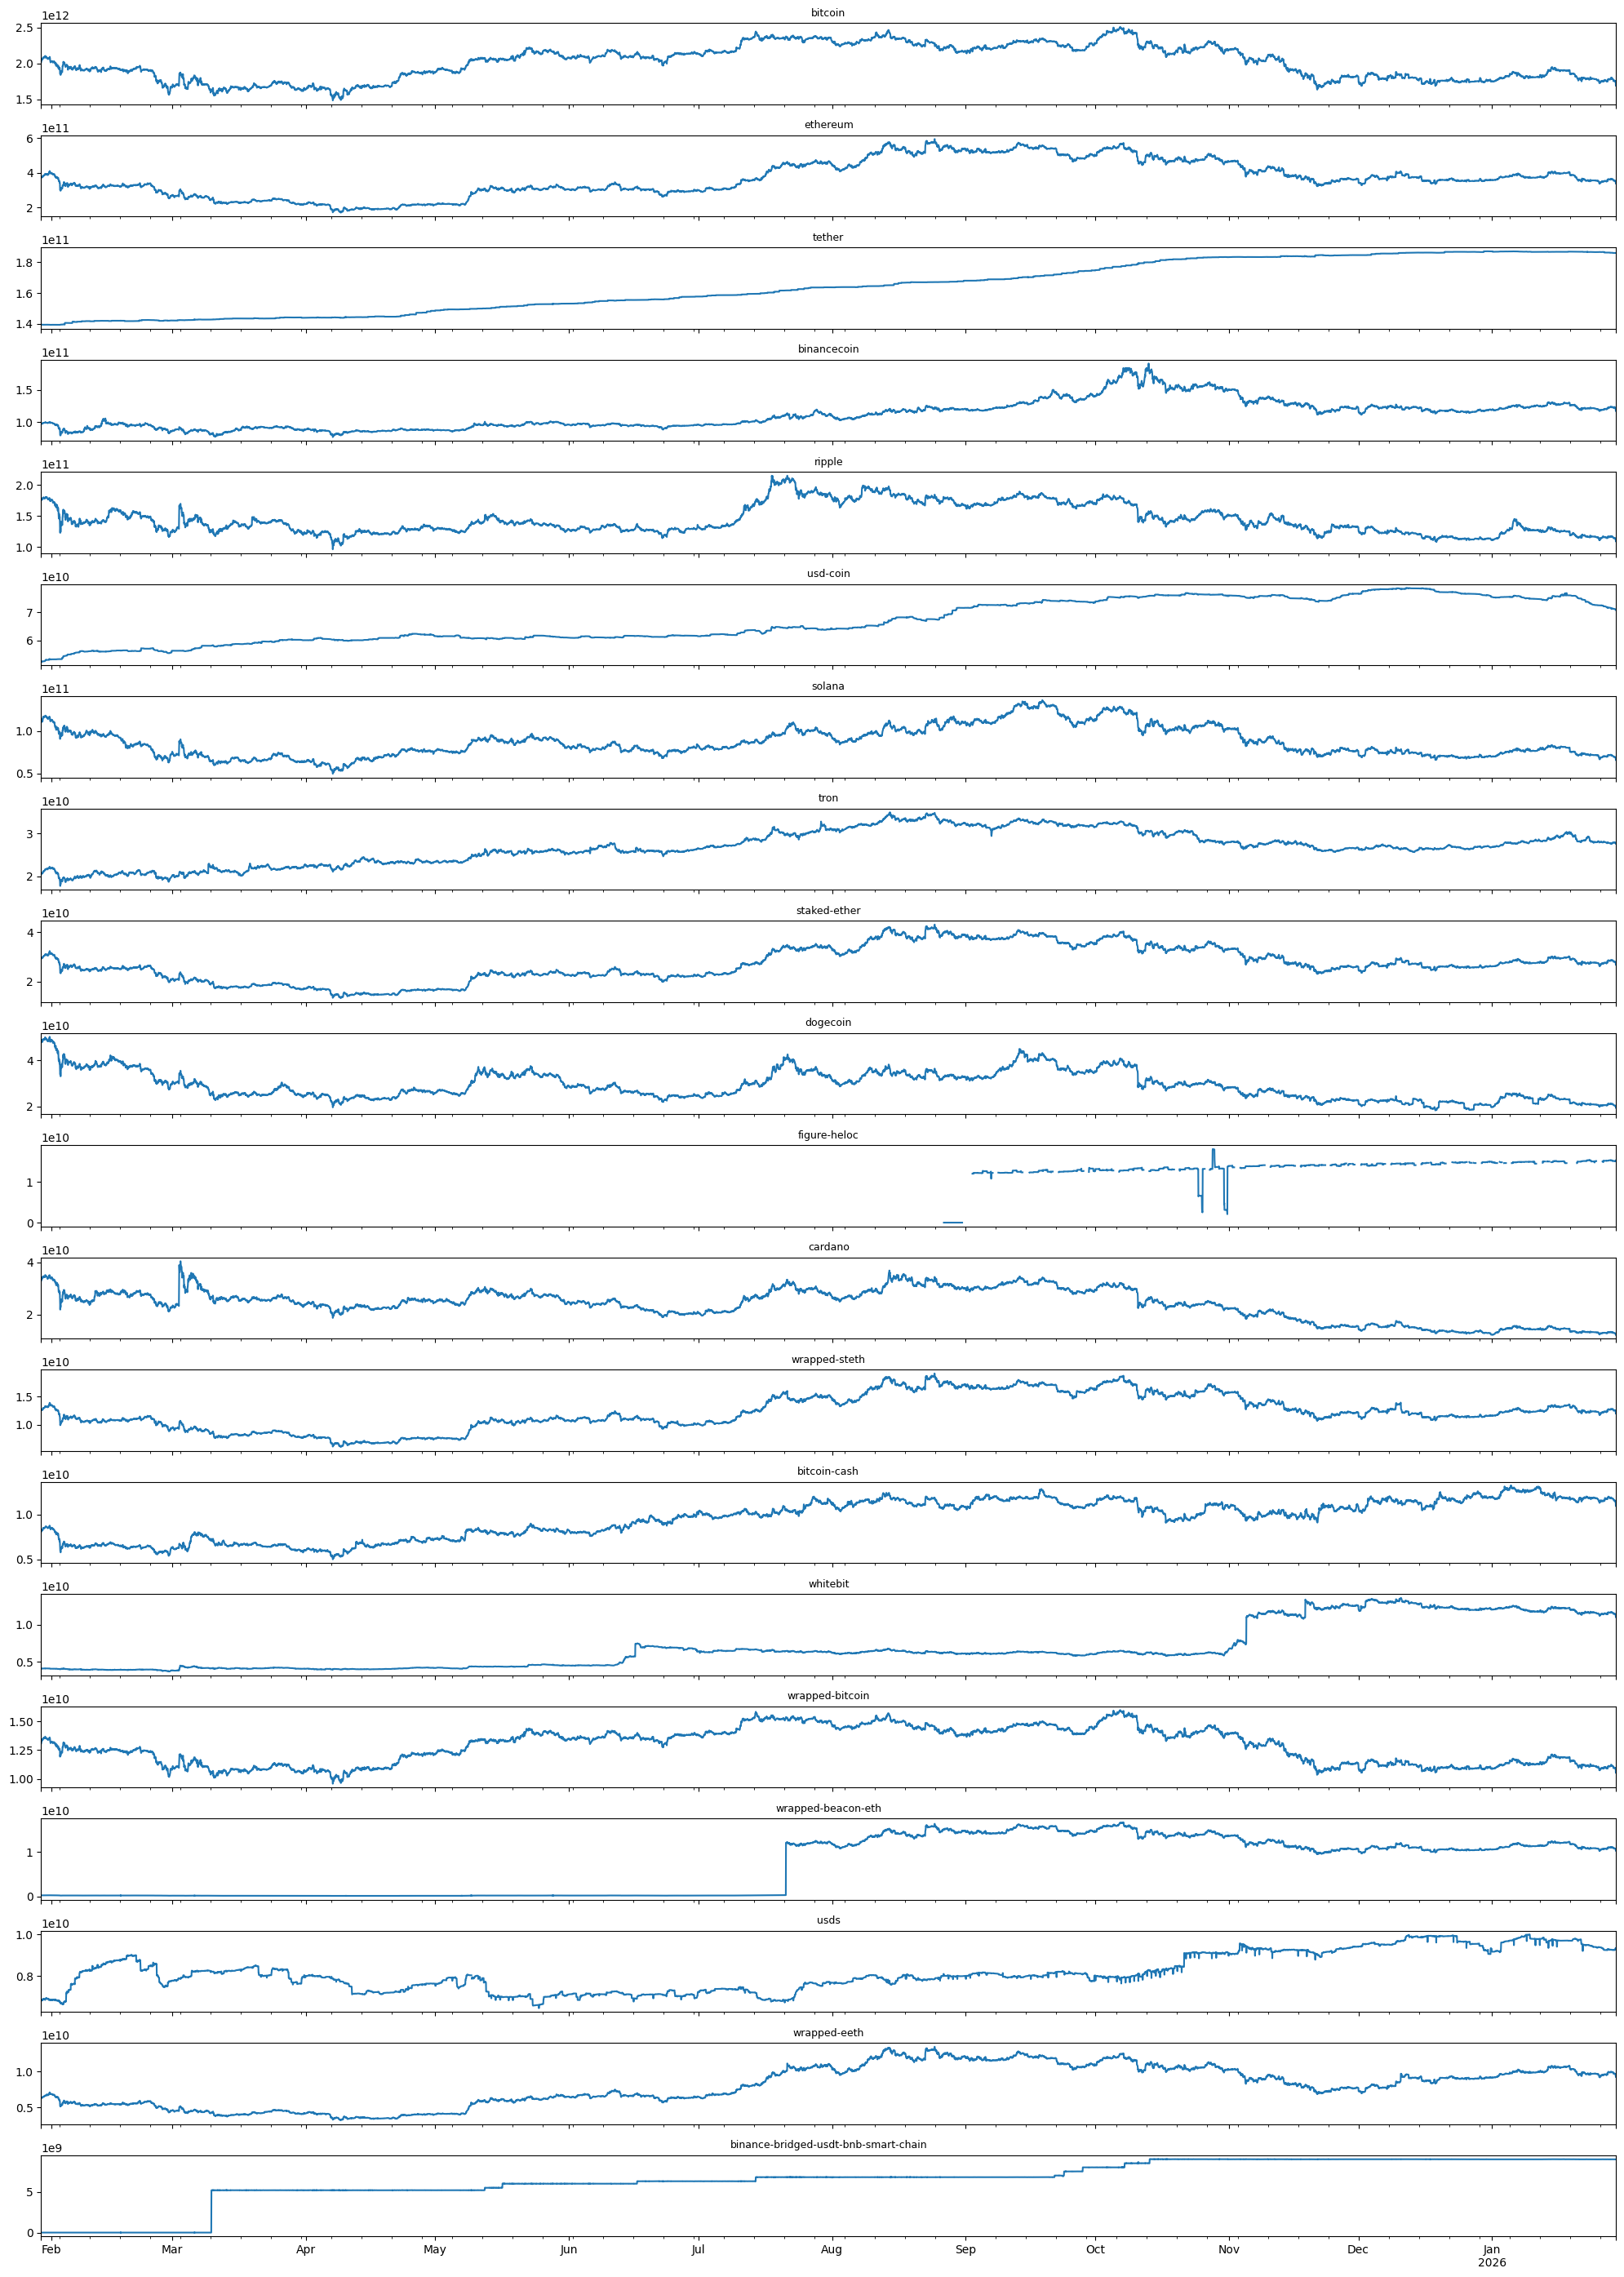

In [51]:
cols = df_h.columns
fig, axes = plt.subplots(
    nrows=20,
    ncols=1,
    figsize=(20, 1.4 * 20),
    sharex=True
)

for ax, col in zip(axes, cols):
    df_h[col].plot(ax=ax)
    ax.set_title(col, fontsize=9)
    # ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [53]:
df_10 = df_h.iloc[:, :10]
df_10 = df_10.interpolate(method="linear")
df_10.to_csv("Cap_10.csv")
df.to_csv("Cap_20_raw.csv")